<a href="https://colab.research.google.com/github/MelomanCat/FaceExtraction/blob/main/ColorHistograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00


Processing frame 1
Face detected in frame 0
x1: 558, y1: 133, x2: 793, y2: 469


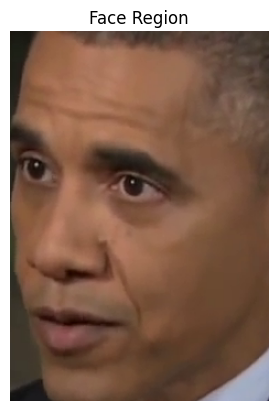

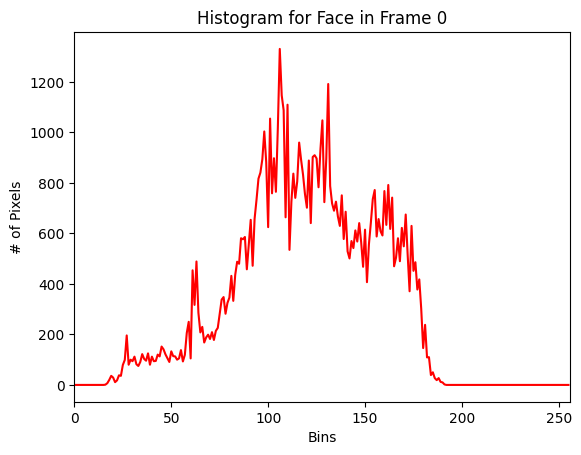

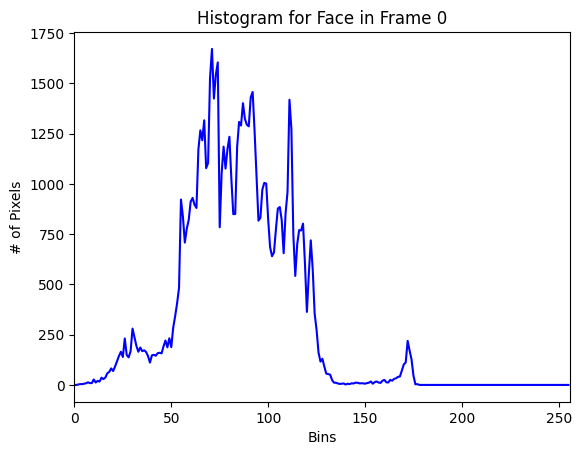

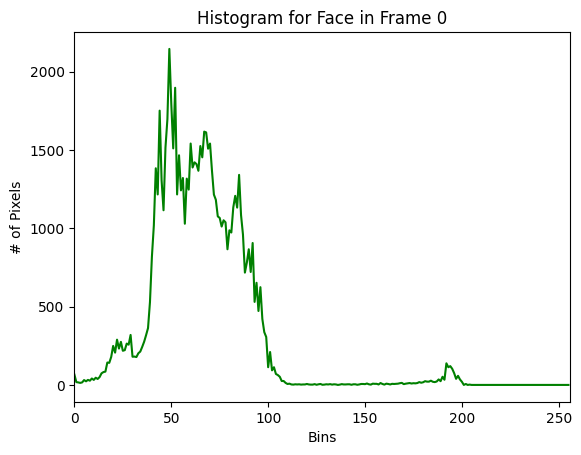

In [3]:
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import pandas as pd
import imutils
import matplotlib.pyplot as plt

# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False)

# Load video
video_path = '/content/drive/MyDrive/Colab Notebooks/OriginalSequences/183.mp4'
cap = cv2.VideoCapture(video_path)
frame_count = min(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), 1)

# Initialize DataFrame to store histograms
histograms_df = pd.DataFrame(columns=['Frame', 'Histogram'])

# Initialize colors for plotting histograms
colors = ("r", "b", "g")

# Process each frame
for frame_num in range(frame_count):
    # Read frame
    ret, frame = cap.read()
    if not ret:
        break

# Convert frame to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print(f"Processing frame {frame_num + 1}")

# Detect faces
boxes, probs = mtcnn.detect(frame_rgb)

# Check if faces were detected
if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = box.astype(int)

# Output message
print(f"Face detected in frame {frame_num}")

# Check the detected face coordinates
print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")

# Extract face region
face_region = frame_rgb[y1:y2, x1:x2]

# display the face region image
fig, ax = plt.subplots()
plt.imshow(face_region)
ax.set_title("Face Region")
ax.axis('off')
plt.show()

# Calculate histogram for the face region
chans = cv2.split(face_region)
histograms = []
for chan in chans:
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    histograms.append(hist)

# Plot histograms for each channel
for hist, color in zip(histograms, colors):
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f"Histogram for Face in Frame {frame_num}")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.show()

# Append histogram to DataFrame
histograms_df = pd.concat([histograms_df, pd.DataFrame({'Frame': frame_num, 'Histogram': hist.flatten()})], ignore_index=True)


# Save histograms DataFrame to file
histograms_df.to_csv('/content/drive/MyDrive/Colab Notebooks/OriginalSequences/histograms.csv', index=False)

# Release video capture
cap.release()
